In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
import os
warnings.filterwarnings('ignore')

In [133]:
data=pd.read_csv('data/cleaned_data.csv')
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
# check for missing values
data.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [4]:
# check for duplicate values
data.duplicated().sum()

0

no duplicate value or null value in the dataset

In [5]:
categorical_columns = ['Course','Marital status','Application mode','Application order','Daytime/evening attendance\t',
                      'Previous qualification','Nacionality','Debtor','Tuition fees up to date', 'Gender', 'Scholarship holder',
                      'International','Curricular units 1st sem (credited)','Curricular units 1st sem (enrolled)','Curricular units 1st sem (evaluations)',
                       'Curricular units 1st sem (approved)','Curricular units 2nd sem (credited)','Curricular units 2nd sem (enrolled)','Curricular units 2nd sem (evaluations)',
                       'Curricular units 2nd sem (approved)','Curricular units 2nd sem (without evaluations)',"Mother's occupation","Father's occupation",'Displaced',
                       'Educational special needs','Target']

for  cat in categorical_columns:
    data[cat] = pd.Categorical(data[cat])


In [18]:
numerical_column = data.select_dtypes(include=['float','int'])
numerical_columns=numerical_column.columns

In [29]:
data.describe()

,Previous qualification (grade),Mother's qualification,Father's qualification,Admission grade,Age at enrollment,Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,132.613314,19.561935,22.275316,126.978119,23.265145,10.640822,0.137658,10.230206,11.566139,1.228029,0.001969
std,13.188332,15.603186,15.343108,14.482001,7.587816,4.843663,0.690880,5.210808,2.663850,1.382711,2.269935
min,95.000000,1.000000,1.000000,95.000000,17.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,125.000000,2.000000,3.000000,117.900000,19.000000,11.000000,0.000000,10.750000,9.400000,0.300000,-1.700000
50%,133.100000,19.000000,19.000000,126.100000,20.000000,12.285714,0.000000,12.200000,11.100000,1.400000,0.320000
75%,140.000000,37.000000,37.000000,134.800000,25.000000,13.400000,0.000000,13.333333,13.900000,2.600000,1.790000
max,190.000000,44.000000,44.000000,190.000000,70.000000,18.875000,12.000000,18.571429,16.200000,3.700000,3.510000


# Data Visualization

In [15]:
class DataVisualization:
    def __init__(self):
        self.fig,self.ax = None,None 
    def categorical(self,column):
        n_rows = (len(column)+3)//4
        self.fig,self.ax = plt.subplots(n_rows,4,figsize=(21,21))
        self.ax = self.ax.flatten()
        for index, col_name in enumerate(column):
            sns.countplot(data=data,x=col_name,ax=self.ax[index])
            self.ax[index].set_title(f'The Distribution of {col_name}')
            self.ax[index].set_ylabel('Count')
            self.ax[index].tick_params(rotation=90)
        # Hide any empty subplots
        for j in range(index+1, len(self.ax)):
            self.fig.delaxes(self.ax[j])
        plt.tight_layout()
        plt.show()
    def numerica_data(self,column):
        n_rows = (len(column)+3)//4
        self.fig,self.ax =plt.subplots(n_rows,4,figsize=(21,21))
        self.ax = self.ax.flatten()
        for index,col_name in enumerate(column):
            sns.histplot(data=data,x=col_name,ax=self.ax[index])
            self.ax[index].set_title(f'The Distribution of {col_name}')
            self.ax[index].set_ylabel('Count')
            self.ax[index].tick_params(rotation=90)
        # Hide any empty subplots
        for j in range(index+1, len(self.ax)):
            self.fig.delaxes(self.ax[j])# Hide any empty subplots
       
        plt.tight_layout()
        plt.show()
        
            
        
        
        

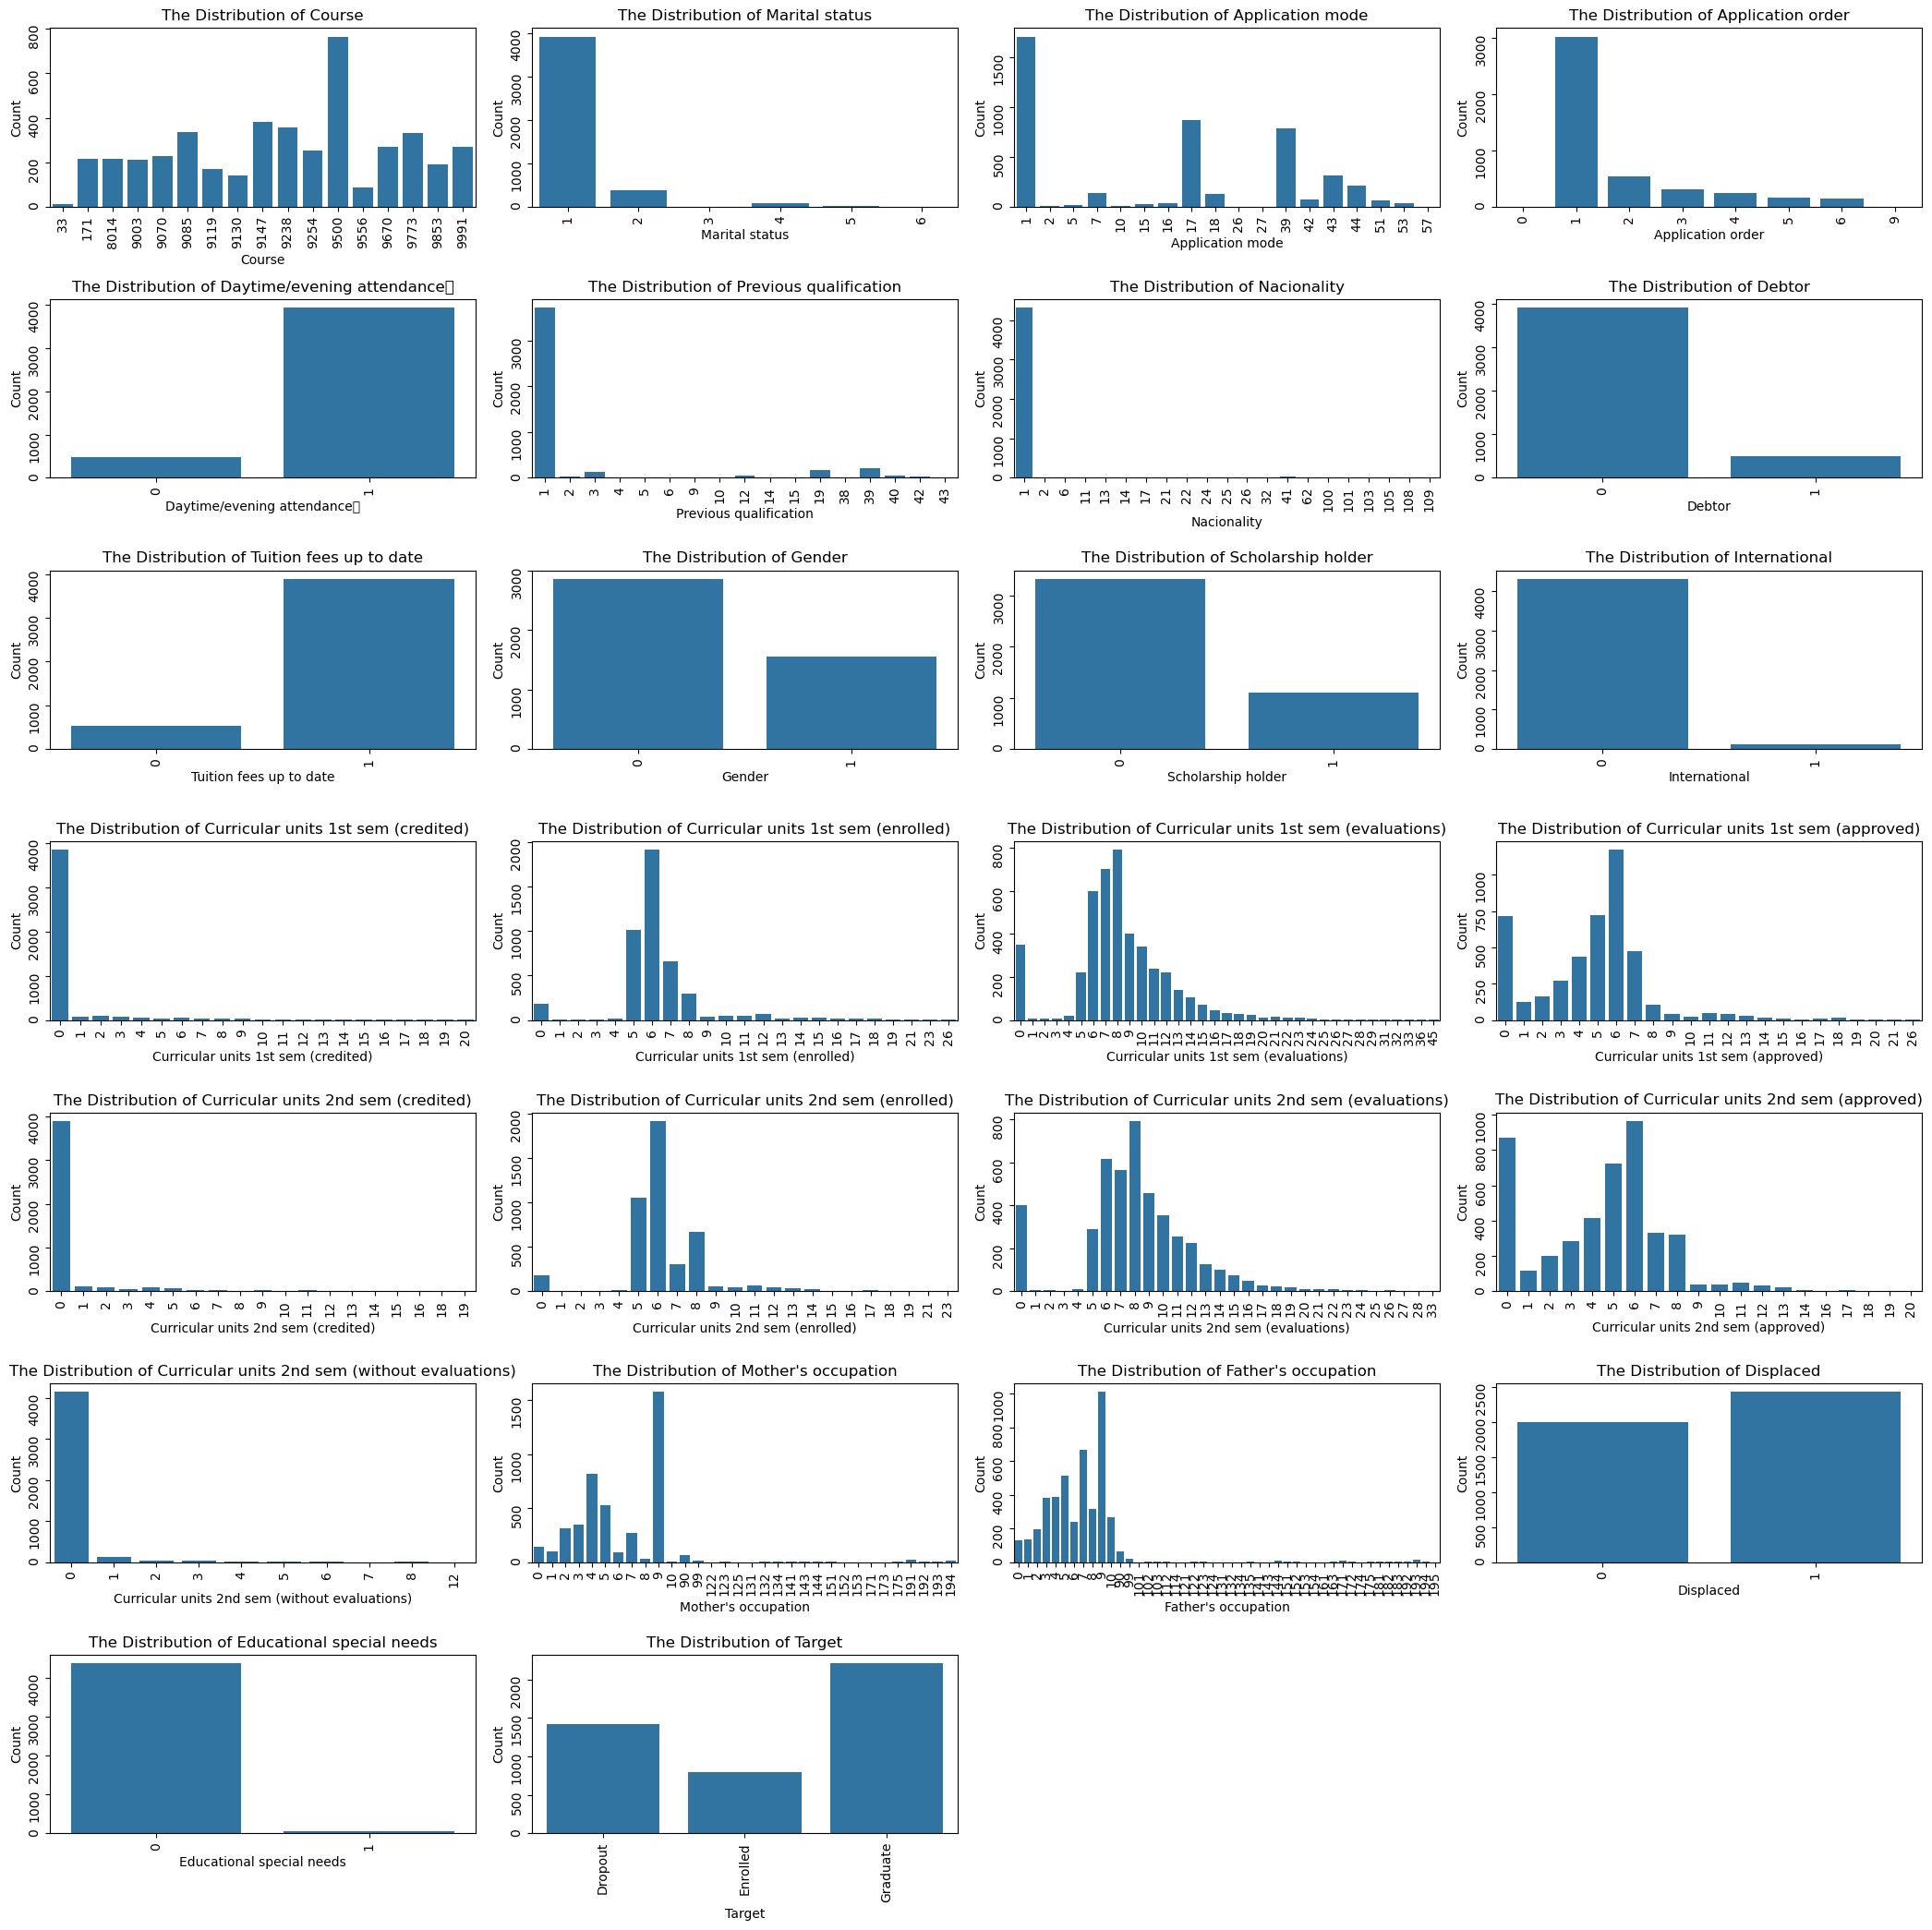

In [12]:
categorical = DataVisualization()
categorical.categorical(categorical_columns)

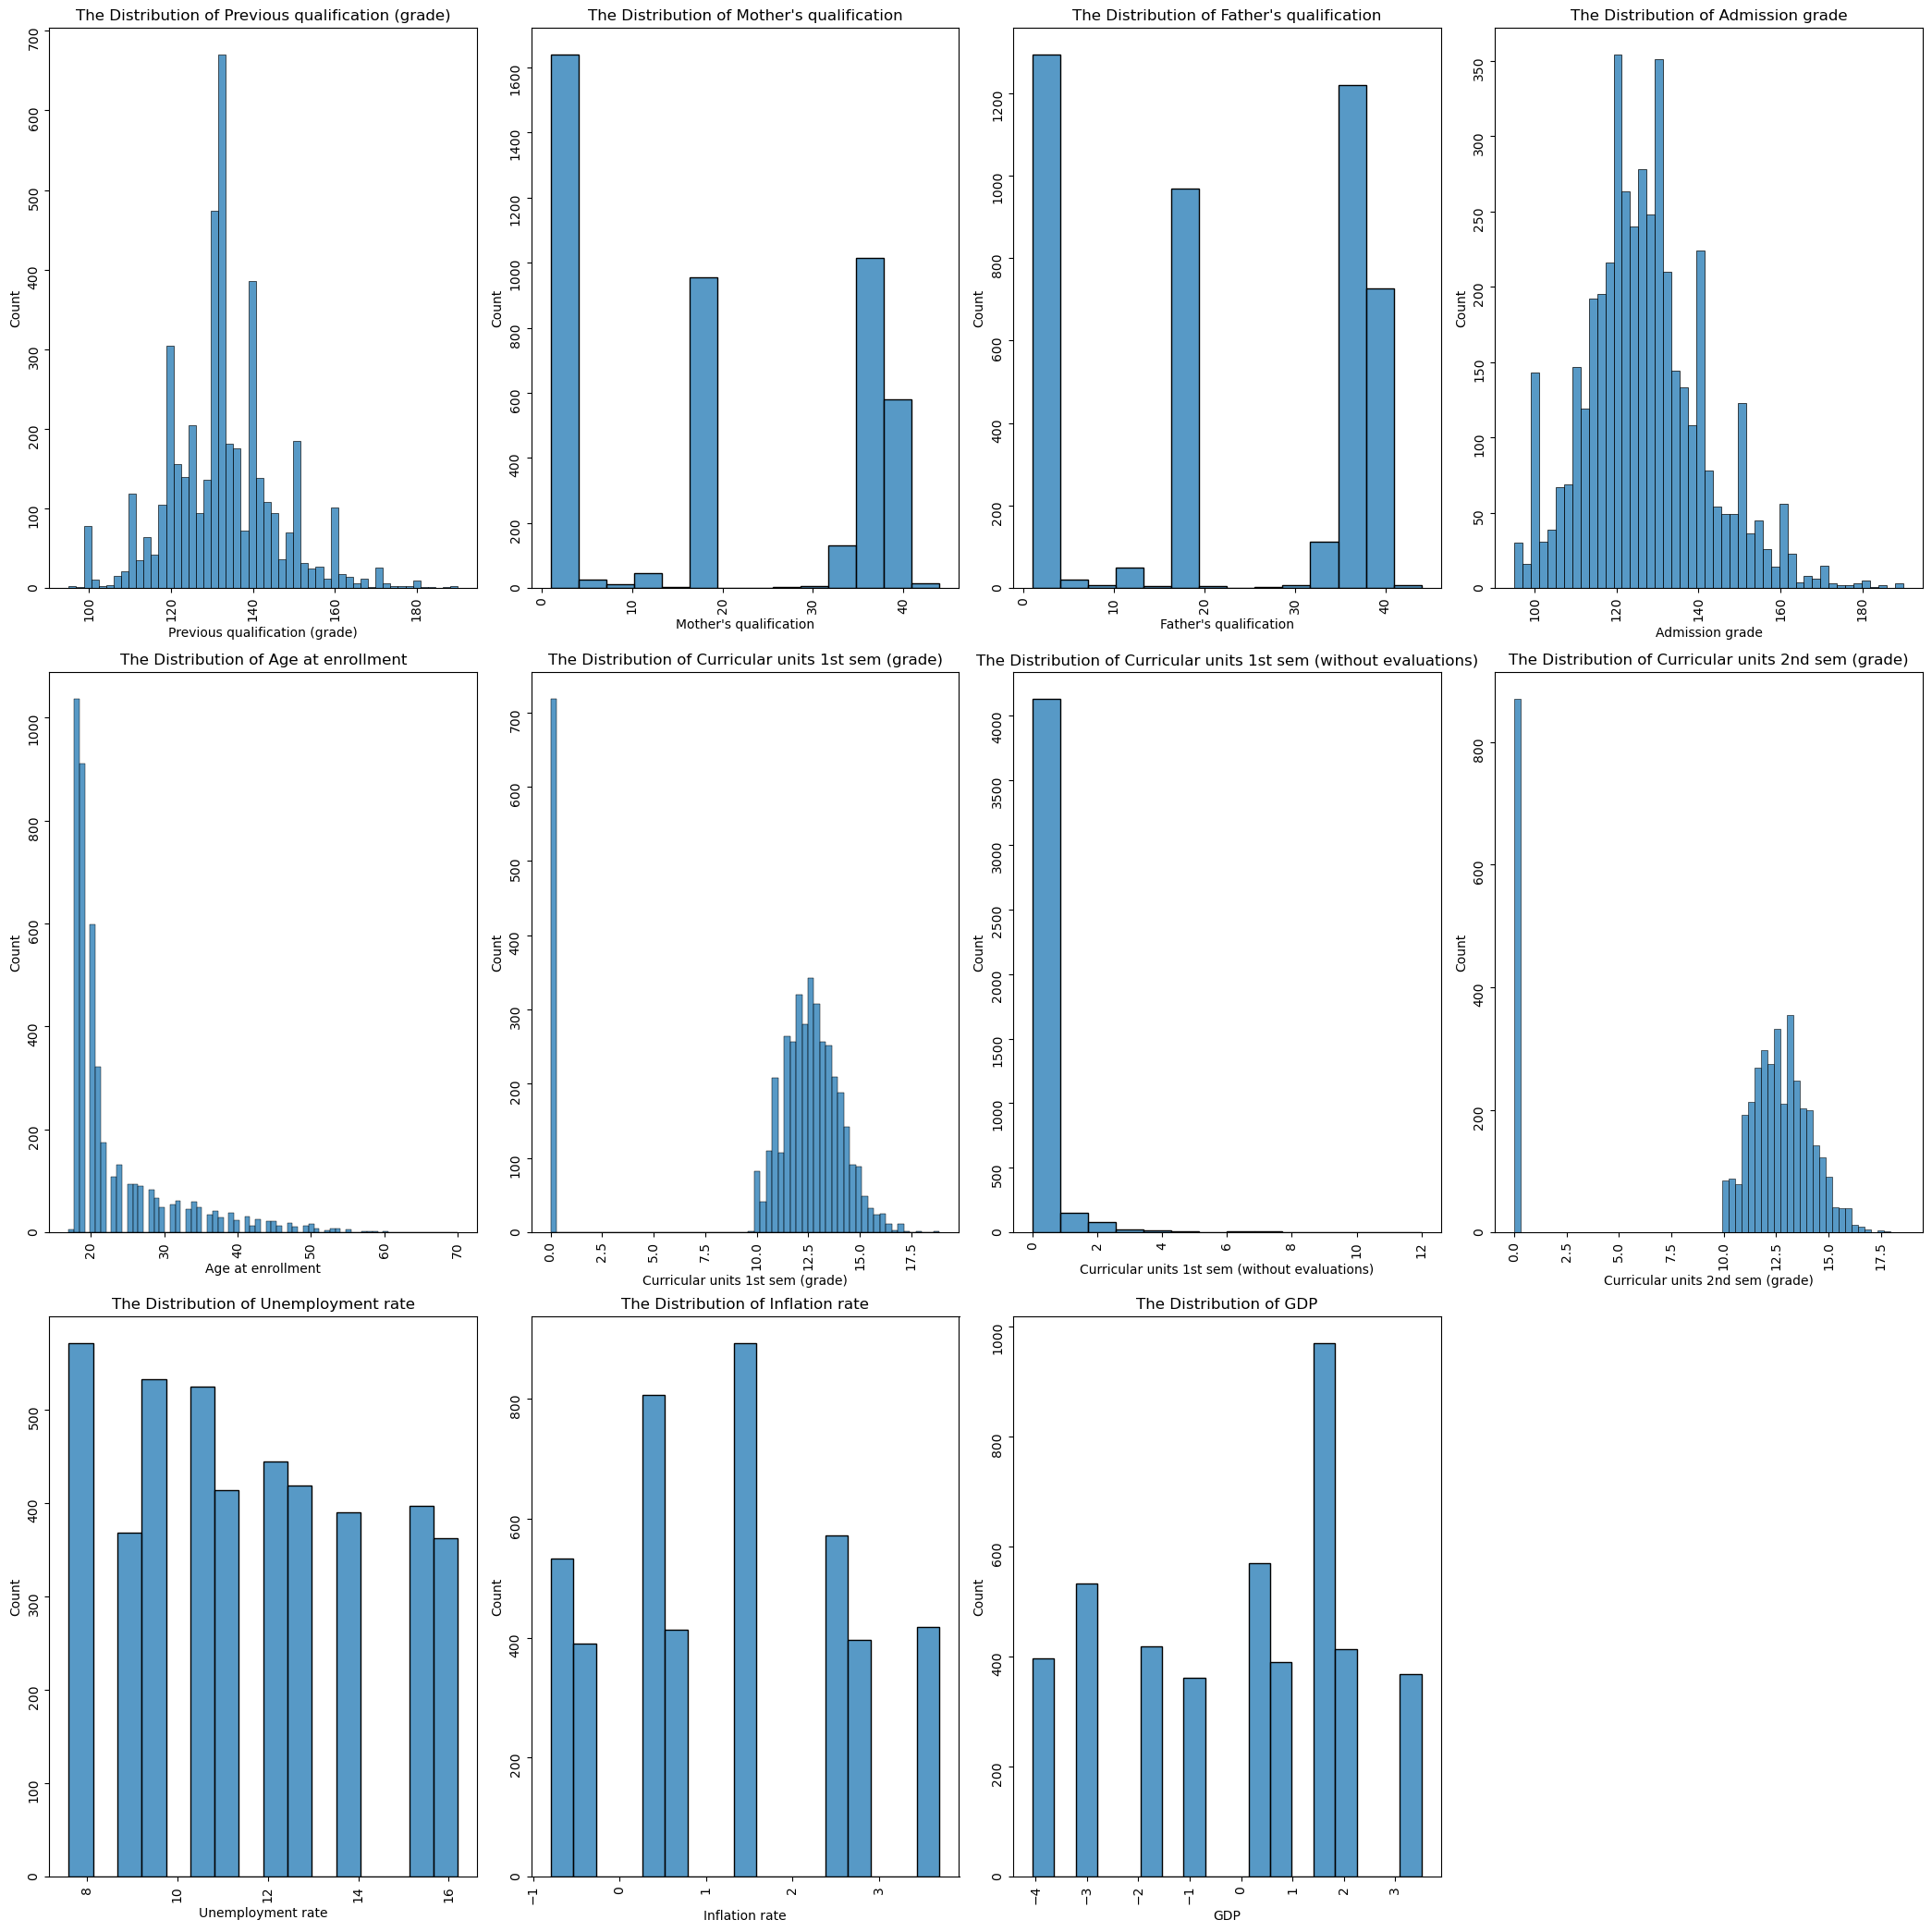

In [19]:
numerical = DataVisualization()
numerical.numerica_data(numerical_columns)

## Our Focus is to determine factors that affect Dropout rate and predict if a student will dropout

## Scholarship

Do Students with scholarship drop out?


In [21]:
dropout_vs_scholarshipholder = data[(data['Scholarship holder']==1)&(data['Target']=='Dropout')]
dropout_vs_scholarshipholder.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
76,1,18,4,9254,1,1,106.0,1,19,37,...,0,6,11,1,11.000000,0,9.4,-0.8,-3.12,Dropout
130,1,1,3,9500,1,1,138.0,1,19,19,...,0,8,9,7,13.742857,0,13.9,-0.3,0.79,Dropout
135,1,1,1,9670,1,1,117.0,1,1,38,...,0,6,9,4,12.500000,0,12.4,0.5,1.79,Dropout
209,1,39,1,9254,1,19,133.1,1,3,19,...,0,6,6,5,12.800000,0,16.2,0.3,-0.92,Dropout
213,1,39,1,9991,0,1,133.1,1,37,37,...,0,5,8,0,0.000000,0,16.2,0.3,-0.92,Dropout


## we have students with Scholarship that Dropout
1. lets find out how many student with scholarship dropout

In [53]:
# function to query the dataset
def query_table(data,var1,var2,val1,val2):
    query = data[(data[var1]==val1)&(data[var2]==val2)].value_counts().sum()
    return query

In [72]:
def visualize_query(data,var,val):
    fig,ax = plt.subplots(figsize=(10,9))
    sns.countplot(data,x=var,hue=val)
    ax.set_title(f'The distribution of {var} given {val}')
    plt.show()
    return
    

In [58]:
# total number of students
data.value_counts().sum()

4424

In [57]:
# total number of scholarship holders
data[data['Scholarship holder']==1].value_counts().sum()

1099

out of a total number of 4424 students only 1099 students have scholarship

In [56]:
# total number of scholarship holders that drop out
query_table(data,'Scholarship holder','Target',1,'Dropout')

134

out of the 1099 scholarship holder 134 students dropout:

this implies that student with scholarship dropout meaning there is another key factor that affects dropout rate

In [ ]:
Debtor, Tuition fees up to date 

 from the query done we have discovered that students wwith scholarship dropout:
1. we want to check if students with scholarship are debtors
2. if students with tution fee not update and have scholarship dropout

In [59]:
query_table(data,"Scholarship holder",'Debtor',1,1)

84

we have 84 students who have scholarship and also debtors

In [62]:
query_table(data,"Scholarship holder",'Tuition fees up to date',1,0)

46

there are 46 students who have scholarship and there tution fees are not up to date

### Observations:
1. few students are awarded schloarship to study
2. students who have scholarship also dropout from school
3. students who have scholarship can also be debtors 
4. students who have scholarship also are the category of students whose tution is not up to data

In [70]:
# Total number of scholarship holders that dropout
data[(data['Scholarship holder']==1)&(data['Target']=='Dropout')].value_counts().sum()

134

In [66]:
# how many stuents have scholarship, are not debtors and tution fee is up to date dropout of school

data[(data['Scholarship holder']==1)&(data['Debtor']==0)&(data['Target']=='Dropout')].value_counts().sum()

103

In [68]:

data[(data['Scholarship holder']==1)&(data['Tuition fees up to date']==1)&(data['Target']=='Dropout')].value_counts().sum()

106

In [69]:

data[(data['Scholarship holder']==1)&(data['Debtor']==0)&(data['Target']=='Dropout')&(data['Tuition fees up to date']==1)].value_counts().sum()

92

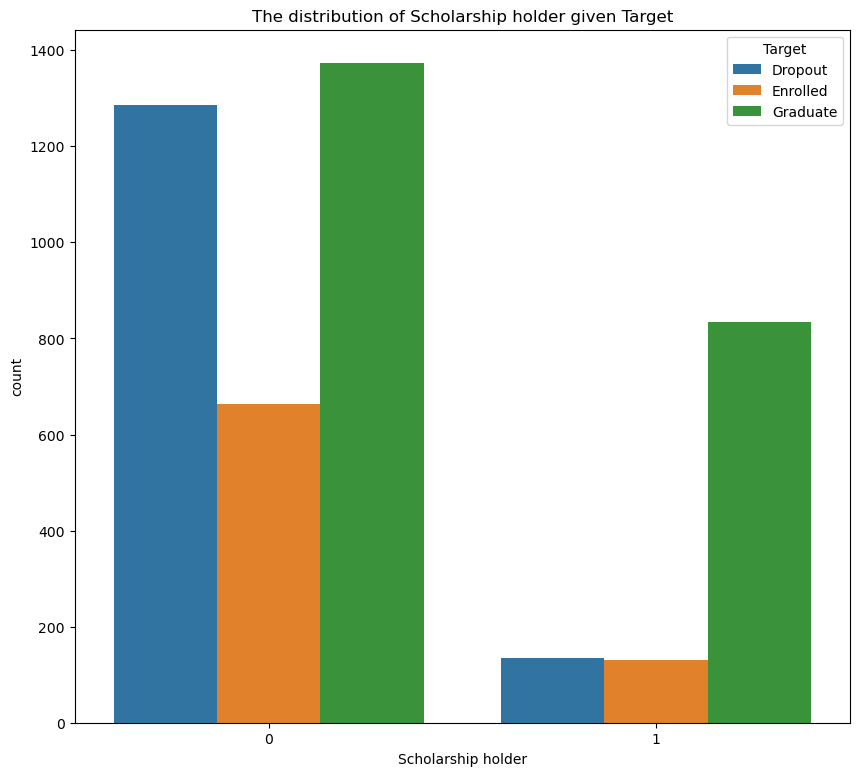

In [74]:
visualize_query(data,'Scholarship holder','Target')

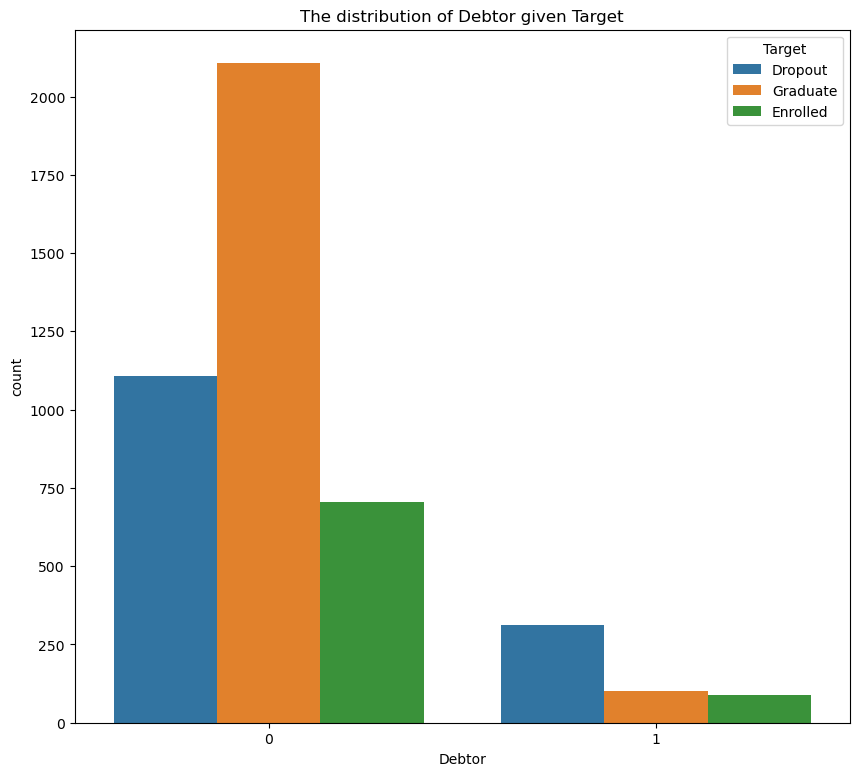

In [137]:
visualize_query(data,'Debtor','Target')

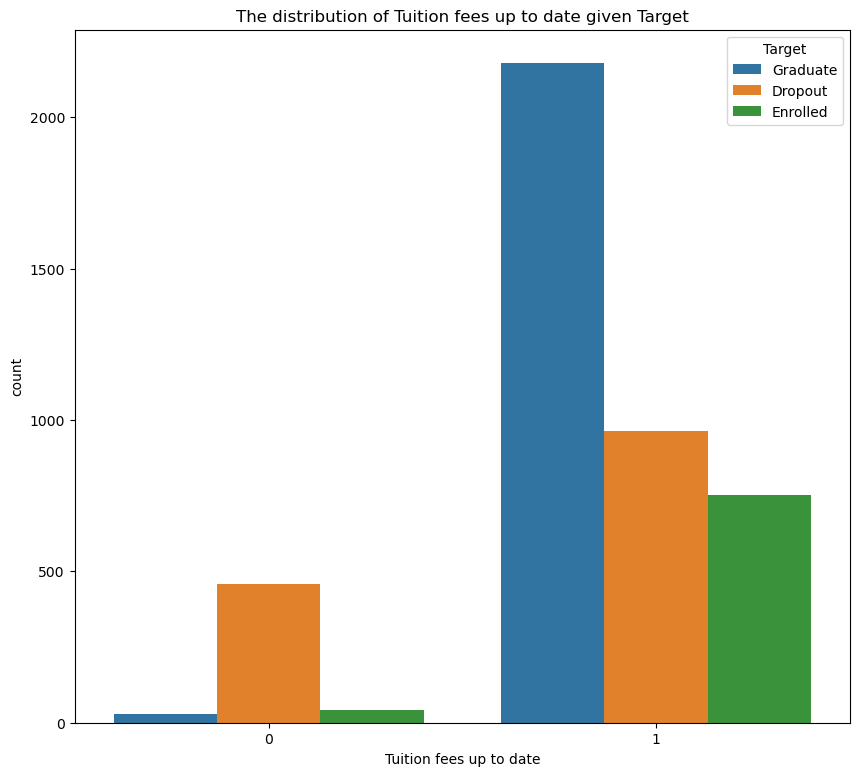

In [138]:
visualize_query(data,'Tuition fees up to date','Target')

## Further Observation
1. offering scholarship does not completely stop students from droping out from school
2. offering scholarship to students reduces the rate of drop out
3. the scholarship is not a full scholarship since students with scholarship can still be debtors and there tuition fee is not up to date

## Reccomendations
Drop out from schools cannot be totally eradicated but can be mitigated
1. Make scholarship available for more number of students
2. Scholarship should cover for the tuition fees
3. Additional finacial support should be given to students

# feature Engineering
1. Data Encoding
2. feature selection
3. feature scaling

In [139]:
# Data Encoding
mapping ={'Graduate':0,'Enrolled':1,'Dropout':2}

data['Target'] = data['Target'].map(mapping)


In [140]:
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,2
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,0
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,2
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,0
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,0


In [ ]:
data_ = data.copy()

In [142]:
X=data.drop(columns=['Target'],axis=1)
y=data['Target']


In [143]:
X.shape, y.shape

((4424, 36), (4424,))

In [145]:
from sklearn.model_selection import train_test_split

In [147]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

Select the best 10 features using mutual info for classification

In [148]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

In [149]:
# calculate the mutual information

mi = mutual_info_classif(X_train,y_train)

In [152]:
# Display the mi scores
mi_scores_df = pd.DataFrame({'Feature': X_train.columns, 'MI Score': mi})
print(mi_scores_df.sort_values(by='MI Score', ascending=False))

                                           Feature  MI Score
30             Curricular units 2nd sem (approved)  0.321283
24             Curricular units 1st sem (approved)  0.257090
31                Curricular units 2nd sem (grade)  0.255005
25                Curricular units 1st sem (grade)  0.185706
16                         Tuition fees up to date  0.094145
29          Curricular units 2nd sem (evaluations)  0.089987
23          Curricular units 1st sem (evaluations)  0.085835
3                                           Course  0.064595
18                              Scholarship holder  0.057429
19                               Age at enrollment  0.052356
15                                          Debtor  0.043102
1                                 Application mode  0.039648
6                   Previous qualification (grade)  0.038647
17                                          Gender  0.036652
22             Curricular units 1st sem (enrolled)  0.033158
10                      

In [25]:
# lets find the total number of dropout students
total_number_of_dropout = data[data['Target']=='Dropout'].value_counts().sum()
total_number_of_dropout

1421

In [27]:
total_number_of_dropoutwithout_scholarship = data[(data['Scholarship holder']==0)&(data['Target']=='Dropout')].value_counts().sum()
total_number_of_dropoutwithout_scholarship 

1287

## Visualize the effect of Scholarship on dropout rate

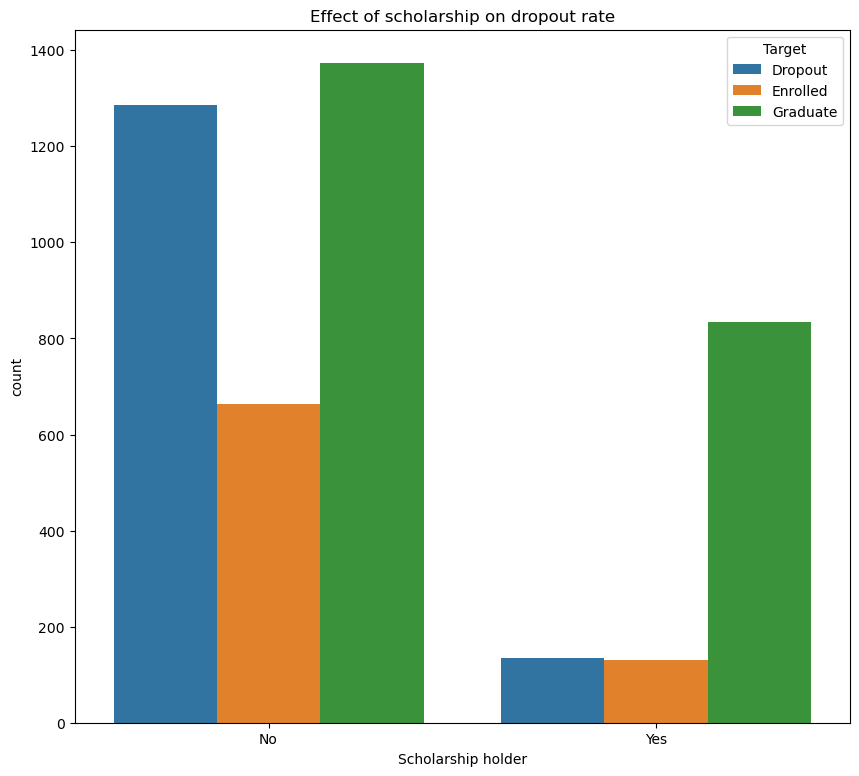

In [28]:
fig,ax = plt.subplots(figsize=(10,9))
sns.countplot(data,x='Scholarship holder', hue='Target')
ax.set_title('Effect of scholarship on dropout rate')
ax.set_xticklabels(['No','Yes'])
plt.show()

from the above chart:
1. Dropout rate is high for students without scholarship
2. few students enrolled with scholarship and more students enroll without scholarship


## from the dataset: people with scholarship also dropout, meaning that there could be another factor responsible for dropout

In [48]:
# check if there are debtors with scholarship
debtors_withscholarship = data[(data['Debtor']==1)&(data['Scholarship holder']==1)].value_counts().sum()
debtors_withscholarship

84

In [49]:
tutionfee_withscholarship = data[(data['Tuition fees up to date']==0)&(data['Scholarship holder']==1)].value_counts().sum()
tutionfee_withscholarship

46

# the nature of the scholarship has to be investigated:
1. we have students who have scholarship who are still debtors
2. we have student who have scholarship whose tution fees are not up to data
3. this means that the scholarship does not cover for tution fee

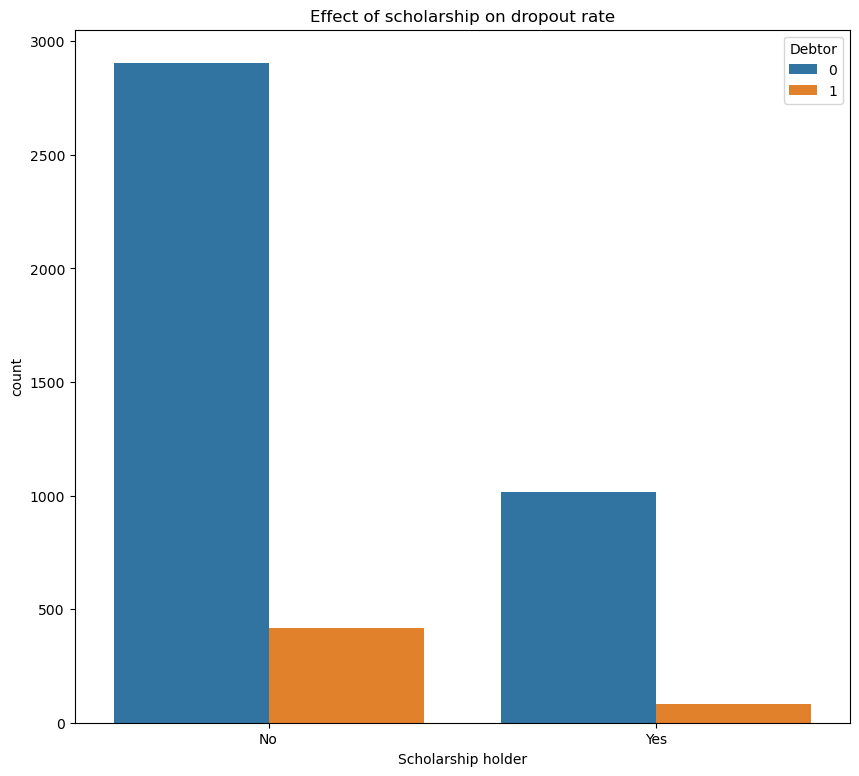

In [50]:
fig,ax = plt.subplots(figsize=(10,9))
sns.countplot(data,x='Scholarship holder', hue='Debtor')
ax.set_title('Effect of scholarship on dropout rate')
ax.set_xticklabels(['No','Yes'])
plt.show()

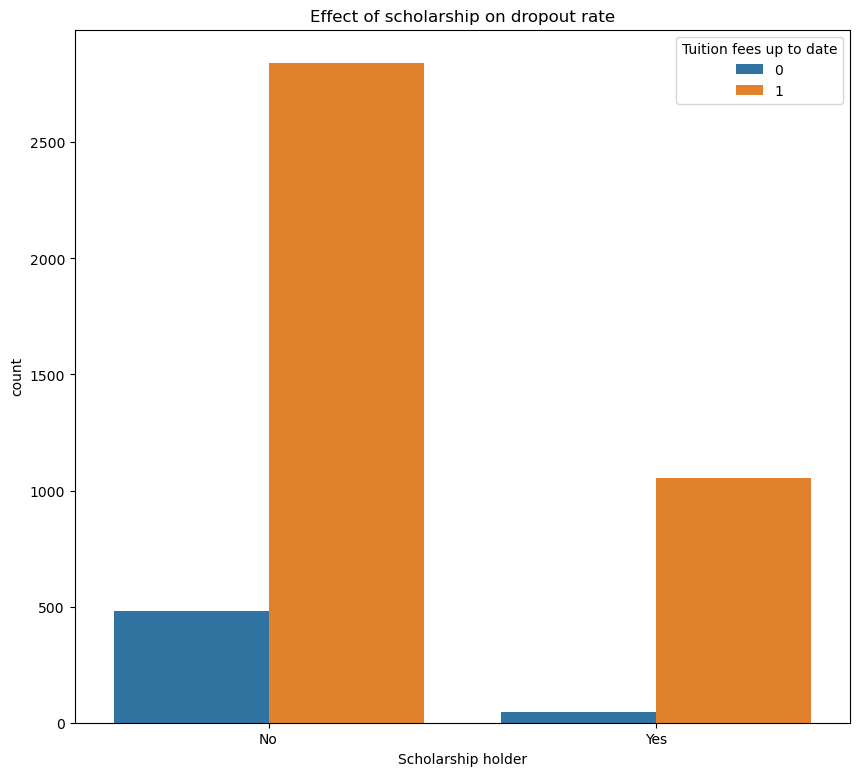

In [52]:
fig,ax = plt.subplots(figsize=(10,9))
sns.countplot(data,hue='Tuition fees up to date', x='Scholarship holder')
ax.set_title('Effect of scholarship on dropout rate')
ax.set_xticklabels(['No','Yes'])
plt.show()

In [41]:
# total number of students
total_number_students = data.value_counts().sum()
total_number_students

4424

In [44]:
# total number of scholarship holders
total_number_of_students_withoutscholarship = data[data['Scholarship holder']==1].value_counts().sum()
total_number_of_students_withoutscholarship 

1099

## Marital Status

how many married people dropout?

In [34]:
# 2 represents married people while 1 represents single people
total_married_people = data[data['Marital status']==2].value_counts().sum()
total_married_people

379

In [36]:
married_people_withScholarship = data[(data['Marital status']==2)&(data['Scholarship holder']==1)].value_counts().sum()
married_people_withScholarship

36

In [37]:
married_people_dropout= data[(data['Marital status']==2)&(data['Target']=='Dropout')].value_counts().sum()
married_people_dropout

179

In [38]:
married_people_withScholarship_dropout= data[(data['Marital status']==2)&(data['Scholarship holder']==1)&(data['Target']=='Dropout')].value_counts().sum()
married_people_withScholarship_dropout

6

## Visualize the effect of being married with the dropout rate

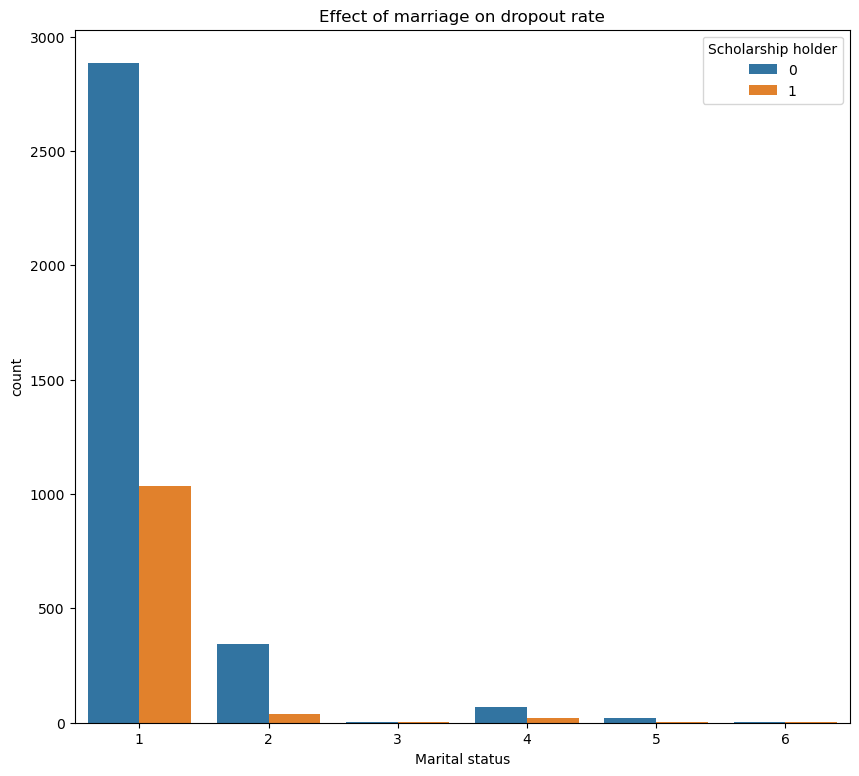

In [45]:
fig,ax = plt.subplots(figsize=(10,9))
sns.countplot(data,x='Marital status', hue='Scholarship holder')
ax.set_title('Effect of marriage on dropout rate')
#ax.set_xticklabels(['No','Yes'])
plt.show()

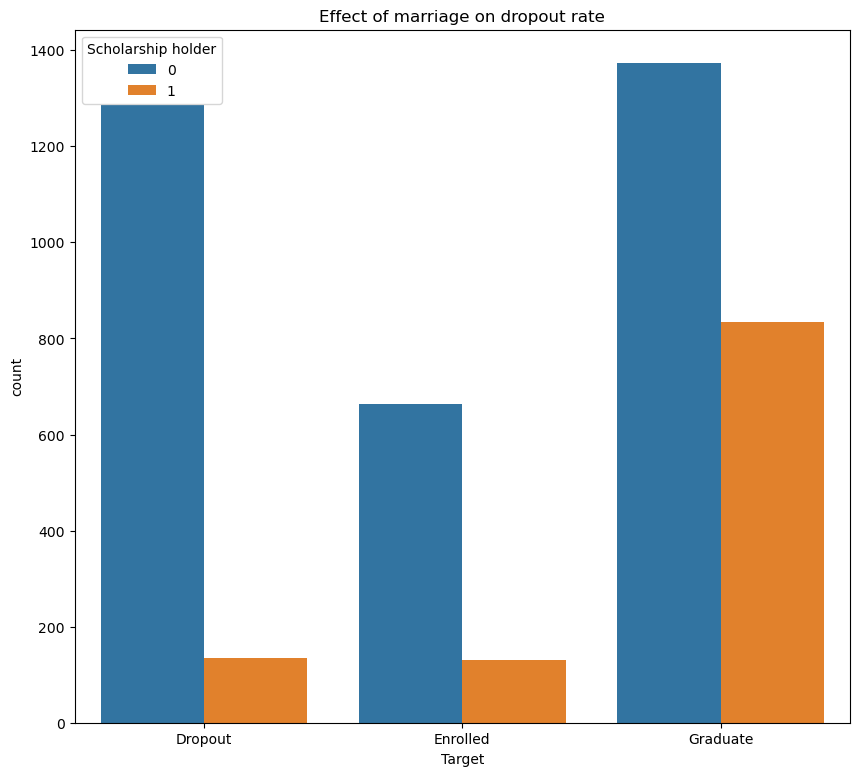

In [46]:
fig,ax = plt.subplots(figsize=(10,9))
sns.countplot(data,x='Target', hue='Scholarship holder')
ax.set_title('Effect of marriage on dropout rate')
#ax.set_xticklabels(['No','Yes'])
plt.show()

In [ ]:
### the number of students who scholarship 